In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [7]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_brussels_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('brussels')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/brussels_{date}.csv',index=False)
get_listings_brussels_timeseries()

In [8]:
# pull in detailed_listings
raw_df_brussels = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_brussels)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(brussels_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 5336 AirBnb listings.


In [9]:
brussels_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2020-12.csv')
brussels_raw_df_12_12_2020.shape





(5614, 16)

In [10]:
# use magic commands 'cd' to change directory
# use glob to locate all files for brussels
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_brussels = glob.glob('brussels/**.csv')
files_brussels

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['brussels/Brussels_2021-08.csv',
 'brussels/Brussels_2021-09.csv',
 'brussels/Brussels_2020-12.csv',
 'brussels/Brussels_2021-02.csv',
 'brussels/Brussels_2021-03.csv',
 'brussels/Brussels_2021-01.csv',
 'brussels/Brussels_2021-10.csv',
 'brussels/Brussels_2021-04.csv',
 'brussels/Brussels_2021-07.csv',
 'brussels/Brussels_2021-06.csv']

In [11]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

brussels_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(brussels_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(brussels_raw_df_12_12_2020['price'].mean(),2)}.")

brussels_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(brussels_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_1_9_2021['price'].mean(),2)}.")

brussels_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(brussels_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_2_8_2021['price'].mean(),2)}.")

brussels_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(brussels_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_3_4_2021['price'].mean(),2)}.")

brussels_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(brussels_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_4_9_2021['price'].mean(),2)}.")

#brussels_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(brussels_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_5_19_2021['price'].mean(),2)}.")

brussels_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(brussels_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_6_3_2021['price'].mean(),2)}.")

brussels_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(brussels_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_7_4_2021['price'].mean(),2)}.")

brussels_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(brussels_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_8_6_2021['price'].mean(),2)}.")

brussels_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(brussels_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_9_7_2021['price'].mean(),2)}.")

brussels_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(brussels_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_10_6_2021['price'].mean(),2)}.")

#brussels_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(brussels_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 5614 AirBnb listings; the avg price is €82.81.
The 1_9_2021 dataset contains 5557 AirBnb listings; the avg price is €77.53.
The 2_8_2021 dataset contains 5507 AirBnb listings; the avg price is €79.5.
The 3_4_2021 dataset contains 5453 AirBnb listings; the avg price is €79.04.
The 4_9_2021 dataset contains 5537 AirBnb listings; the avg price is €79.75.
The 6_3_2021 dataset contains 5642 AirBnb listings; the avg price is €84.2.
The 7_4_2021 dataset contains 5718 AirBnb listings; the avg price is €83.65.
The 8_6_2021 dataset contains 5531 AirBnb listings; the avg price is €85.18.
The 9_7_2021 dataset contains 5443 AirBnb listings; the avg price is €87.12.
The 10_6_2021 dataset contains 5336 AirBnb listings; the avg price is €90.94.


In [12]:
df_list_brussels = [brussels_raw_df_12_12_2020, brussels_raw_df_1_9_2021, brussels_raw_df_2_8_2021,
           brussels_raw_df_3_4_2021, brussels_raw_df_4_9_2021,  brussels_raw_df_6_3_2021, brussels_raw_df_7_4_2021,
           brussels_raw_df_8_6_2021, brussels_raw_df_9_7_2021, brussels_raw_df_10_6_2021]

dates_brussels = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_brussels = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_brussels = []

def airbnb_parse_brussels(df_list, files):
    for file in files_brussels:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_{file}.csv")
        print(f"The {file} brussels dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_brussels(df_list, dates):
    for file in files_brussels:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_{file}.csv")
        #print(f"The {date} brussels dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_brussels.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_brussels)

brussels_parse = airbnb_parse_brussels(df_list_brussels, files_brussels)


The 2020-12 brussels dataset contains 5614 AirBnb listings -- the avg price is €82.81.
The 2021-01 brussels dataset contains 5557 AirBnb listings -- the avg price is €77.53.
The 2021-02 brussels dataset contains 5507 AirBnb listings -- the avg price is €79.5.
The 2021-03 brussels dataset contains 5453 AirBnb listings -- the avg price is €79.04.
The 2021-04 brussels dataset contains 5537 AirBnb listings -- the avg price is €79.75.
The 2021-06 brussels dataset contains 5642 AirBnb listings -- the avg price is €84.2.
The 2021-07 brussels dataset contains 5718 AirBnb listings -- the avg price is €83.65.
The 2021-08 brussels dataset contains 5531 AirBnb listings -- the avg price is €85.18.
The 2021-09 brussels dataset contains 5443 AirBnb listings -- the avg price is €87.12.
The 2021-10 brussels dataset contains 5336 AirBnb listings -- the avg price is €90.94.


In [13]:
brussels_summary = airbnb_to_frame_brussels(df_list_brussels, files_brussels)
brussels_summary['Date of scrape'] = pd.to_datetime(brussels_summary['Date of scrape'])
brussels_summary['City'] = 'brussels'
brussels_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,5614,82.81,60.0,0,5000,1.32,brussels
1,2021-01-01,5557,77.53,60.0,0,5000,1.26,brussels
2,2021-02-01,5507,79.50,60.0,0,5000,1.23,brussels
3,2021-03-01,5453,79.04,60.0,0,5000,1.22,brussels
4,2021-04-01,5537,79.75,60.0,0,5000,1.19,brussels
5,2021-06-01,5642,84.20,60.0,0,8200,1.21,brussels
6,2021-07-01,5718,83.65,60.0,0,5000,1.24,brussels
7,2021-08-01,5531,85.18,65.0,0,5000,1.31,brussels
8,2021-09-01,5443,87.12,65.0,0,5000,1.37,brussels
9,2021-10-01,5336,90.94,67.0,0,5000,1.39,brussels


In [14]:
brussels_summary_listings = brussels_summary[['Date of scrape','# of Listings']]
brussels_summary_listings.set_index('Date of scrape', inplace=True)


brussels_summary_prices_avg = brussels_summary[['Date of scrape', 'Avg Price']]
brussels_summary_prices_avg.set_index('Date of scrape', inplace=True)

brussels_summary_prices_median = brussels_summary[['Date of scrape', 'Median Price']]
brussels_summary_prices_median.set_index('Date of scrape', inplace=True)

brussels_summary_reviews_permonth = brussels_summary[['Date of scrape', 'Avg reviews per month']]
brussels_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

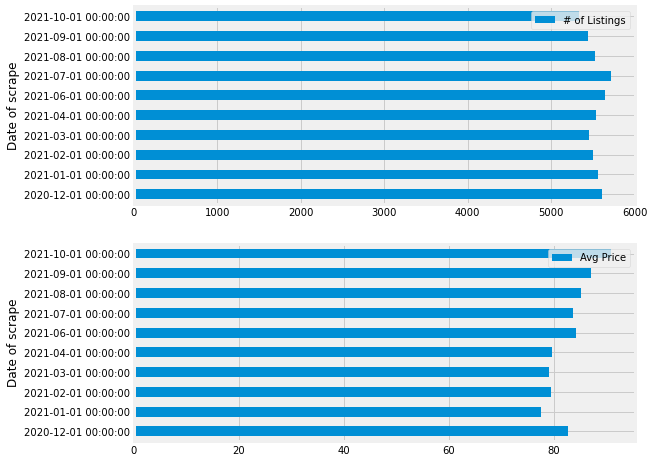

In [15]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

brussels_summary_listings.plot(ax=ax1, kind='barh')
brussels_summary_prices_avg.plot(ax=ax2, kind='barh')

In [16]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

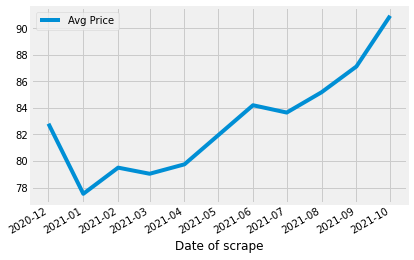

In [17]:
brussels_summary.plot(x='Date of scrape', y='Avg Price')

In [18]:
master_df_brussels = pd.concat(df_list_brussels)
master_df_brussels = master_df_brussels[master_df_brussels['room_type']=='Entire home/apt']
master_df_brussels_unique = master_df_brussels.drop_duplicates(subset='id')
#master_df_brussels_unique = master_df_brussels[master_df_brussels_unique['room_type']=='Entire home/apt']
master_df_brussels_unique['room_type'].value_counts()

Entire home/apt    5791
Name: room_type, dtype: int64

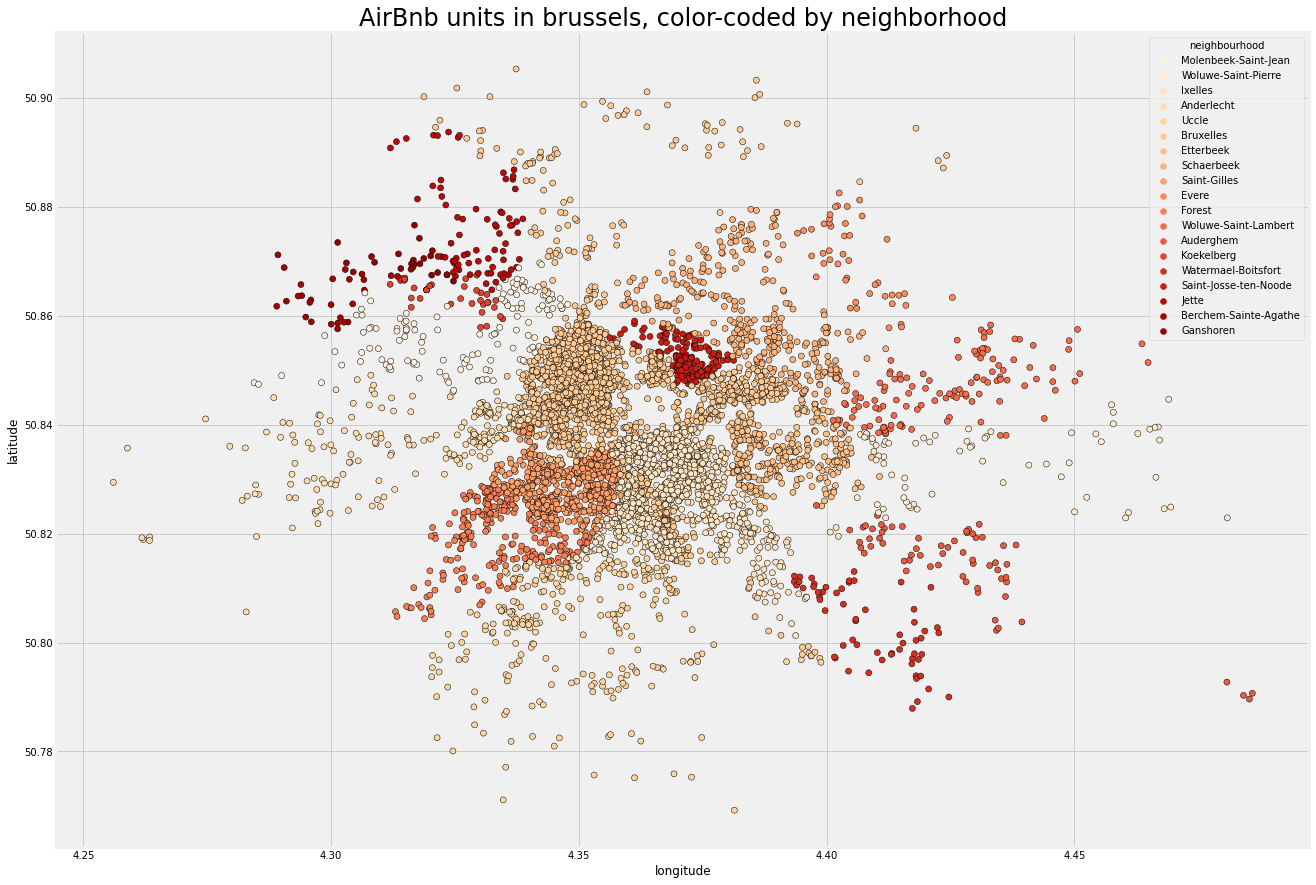

In [19]:
title = 'AirBnb units in brussels, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_brussels_unique.longitude, master_df_brussels_unique.latitude, hue = master_df_brussels_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_brussels.png')
plt.show()

## Add review data through a join

In [20]:
df_reviews = pd.concat([brussels_raw_df_10_6_2021,raw_df_brussels],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(3748, 75)

## Regression

In [21]:
#df_reviews_.columns

In [22]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [23]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -23.17768865148109
Coefficients:  [ 17.35076794  30.19549835  -3.46950705   1.04700143   3.84668979
   4.08402957   1.95914232  15.73216549 -27.33512191]
LinearRegression()


In [24]:
y_pred2 = regr.predict(X_)

In [25]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(2781, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

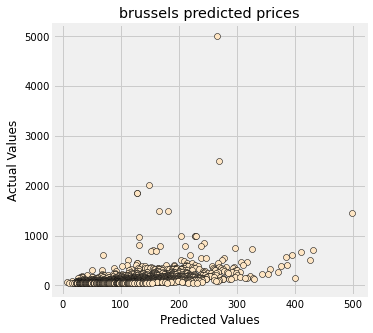

In [26]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('brussels predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [27]:
df_result.index

Int64Index([1177, 4002, 4686, 2415, 2416, 1931, 2328, 5144, 1584, 2706,
            ...
            1124, 3252, 2655, 2844,  734, 4245, 4479, 3378,   67,  411],
           dtype='int64', length=2781)

In [28]:
raw_df_brussels.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2352,https://www.airbnb.com/rooms/2352,20211023135511,2021-10-23,"Triplex-2chmbrs,grande sdb,terrasse= tous confort","Cute 2 bedrooms appartment , large bathroom and huge living room with open kitchen and direct acess on the terasse in the residential area. Easy acess to the downtown as well as to the ring in order to visit the rest of Belgium.<br />IMPORTANT: Taxe de séjour 5€/night(nuit) to be paid in cash at the arrival (Merci de prévoir5 €/nuit taxe régionale qui reste à payer directement à votre arrive en espèces<br /><br /><b>The space</b><br />ENGLISH VERSION:<br />The Triplex (total size 120 sqm) very luminous and quiet. Ideal for 1-4 people !The price mentioned at the announcement is for 4 people max., however appartment can accomodate 5 people,-additional single bed/matrass can be placed upon request .<br />It comprises two bedrooms (one with the dressing room), one large living room open to the dining room with the great terasse, view to the garden ( high ceilings), a large bathroom (bath and shower), toilet, and a big fully equiped kitchen with oven, microwave, refrigerator, coffee machin","Basilique Koekelberg, Chateaux Karreveld",https://a0.muscache.com/pictures/03be5c73-222b-48a9-a0cc-431023aba08b.jpg,2582,https://www.airbnb.com/users/show/2582,...,4.76,4.06,4.47,NaN,t,2,2,0,0,0.21
1,2354,https://www.airbnb.com/rooms/2354,20211023135511,2021-10-23,COURT/Long- 1chmb+1salon+sdd+terras,"<b>The space</b><br />ENGLISH VERSION: <br />Fully furnished (URL HIDDEN) stay of one full month offered at ""special"" price all included! <br />Ideal for 1-3 people max. Close to Blvd Metewie,Rue du Korenbeek - public transport tram 82,83, bus 49, metro Bekant or Gare de Ouest/West Station). <br />1bedroom, living room, big equipped kitchen( Owen, fridge/freezer, microwave, toaster, coffee machine), bathroom(shower and WC) and private terrace. <br />(Gym, tennis courts, swimming pool, shops, groceries and public transport very near by, easy access to the centre downtown and to the ring/highway) <br /> <br />Apartment is fully furnished with all you need!!!! <br />Price depends on the length of the stay <br />SHORT and LONG STAY possibilities (all charges included apart of final cleaning after your departure and rental of towels and bedding. 50 € will be requested at your arrival against the reception the keys. Charges included :water, electricity, gas,common charges, Internet and",NaN,https://a0.muscache.com/pictures/82859745/f5c70647_original.jpg,2582,https://www.airbnb.com/users/show/2582,...,5.00,5.00,5.00,NaN,t,2,2,0,0,0.03
2,48180,https://www.airbnb.com/rooms/48180,20211023135511,2021-10-23,Top Apart/location 0 default 2rooms,"Top Apart, perfect location 0 default, 2rooms spacious living room, central location, quite, terrace perfectly oriented, easy to clean, fully furnished<br /><br /><b>The space</b><br />125 square meter apart, perfect central location, lots of public transport less than a minute of walk, including underground and taxi station. <br />On Square Montgomery, the best spot in Brussels for moving around with public transport. <br />wonderful dark sleeping room, for quite sleep <br />terrace sunny all day <br />spacious living room <br />fully furnished <br />can house 3 people <br />Full view from living room on the bigget water fountain in Brussels and green space",NaN,https://a0.muscache.com/pictures/276722/2a47904c_original.jpg,219560,https://www.airbnb.com/users/show/219560,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,52796,https://www.airbnb.com/rooms/52796,20211023135511,2021-10-23,Bright apartment in Ixelles/Louise,"You will lov

In [29]:
df_result['id'] = df_result.index.values
df_result.shape

(2781, 4)

In [30]:
raw_df_brussels.index.values
df_result.index.values

array([1177, 4002, 4686, ..., 3378,   67,  411])

In [31]:
df_result_merge = df_result.merge(raw_df_brussels, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(5336, 77)

In [32]:
df_join = df_result.join(raw_df_brussels, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                            0
Predicted                                         0
Diff                                              0
id_x                                              0
id_y                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               385
Length: 78, dtype: int64

In [33]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [34]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_brussels = df_print[df_print['Predicted']>0]
df_print_brussels.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
1177,1177,5000,"$5,000.00",266.435120,-4733.564880,https://www.airbnb.com/rooms/16564081,50.85131,4.35290,7,Bruxelles,5.0,5.0,4.0,5.0,5.0,4.0,4.0,1
4002,4002,2500,"$2,500.00",269.930939,-2230.069061,https://www.airbnb.com/rooms/45672805,50.83788,4.38411,6,Etterbeek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4686,4686,2005,"$2,005.00",148.109182,-1856.890818,https://www.airbnb.com/rooms/50588285,50.84702,4.35503,3,Bruxelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2415,2415,1851,"$1,851.00",127.288907,-1723.711093,https://www.airbnb.com/rooms/32841836,50.83071,4.35849,2,Bruxelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2416,2416,1851,"$1,851.00",127.288907,-1723.711093,https://www.airbnb.com/rooms/32842045,50.82996,4.35795,2,Saint-Gilles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [35]:
df_print_brussels['neighbourhood_cleansed'].value_counts()

Bruxelles                966
Ixelles                  474
Saint-Gilles             272
Schaerbeek               158
Uccle                    149
Forest                   124
Etterbeek                123
Anderlecht               101
Molenbeek-Saint-Jean      80
Saint-Josse-ten-Noode     77
Woluwe-Saint-Lambert      57
Woluwe-Saint-Pierre       35
Jette                     35
Watermael-Boitsfort       35
Auderghem                 30
Evere                     25
Koekelberg                19
Berchem-Sainte-Agathe     14
Ganshoren                  7
Name: neighbourhood_cleansed, dtype: int64

In [36]:
df_print_brussels_final = df_print_brussels.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_brussels_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [37]:
df_brussels_query = df_print_brussels_final.query('number_of_reviews >11 & accommodates <=6')
df_brussels_query.shape
#df_brussels_query.head()

(1218, 18)

In [38]:
df_brussels_query_filter = df_brussels_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_brussels_query_filter.shape


(733, 18)

In [39]:
df_brussels_query_filter.shape

(733, 18)

In [40]:
df_neighborhood_plot = df_print_brussels_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
3,Bruxelles,131.176960
13,Saint-Josse-ten-Noode,115.571429
18,Woluwe-Saint-Pierre,112.931034
2,Berchem-Sainte-Agathe,112.545455
15,Uccle,110.184000
0,Anderlecht,108.202247
8,Ixelles,108.178049
16,Watermael-Boitsfort,107.551724
10,Koekelberg,98.684211
11,Molenbeek-Saint-Jean,96.164179


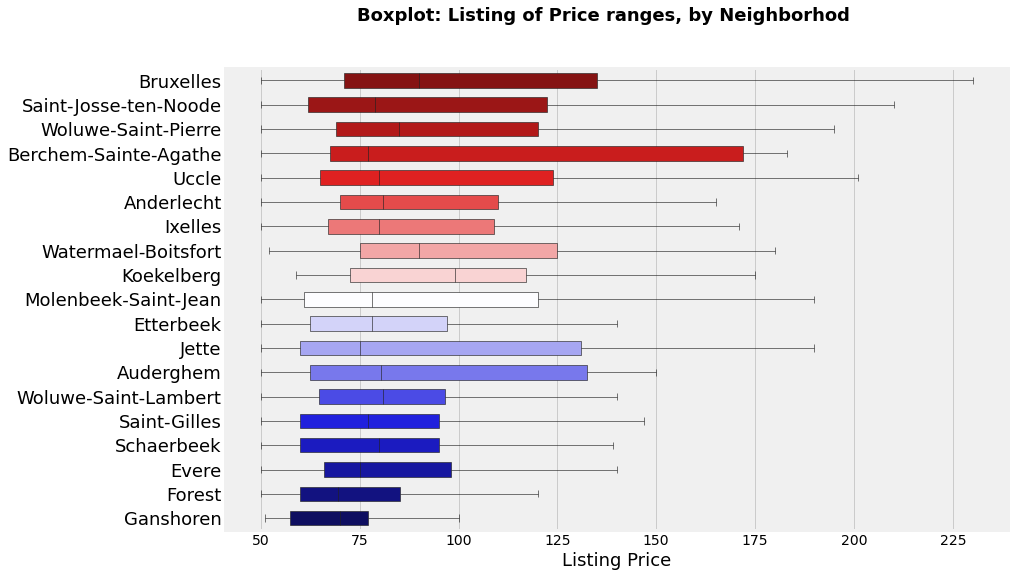

In [41]:
df_neighborhood_plot = df_print_brussels_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_brussels_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

fig.savefig('brussels_neighborhood_boxplot.png')

In [42]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [43]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_brussels)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 5336 files in the dataset
There is 2515 to be regressed with accommodates <=4


In [44]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  -3.634553245664364
Coefficients:  [ 11.07005371  17.09655238  -5.32497999   0.72902668  -3.21873955
 -11.42139279   1.29565458  21.65817312  -3.95937677]
LinearRegression()


In [45]:
y_pred2_4 = regr4.predict(X_4)

In [46]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(2155, 3)

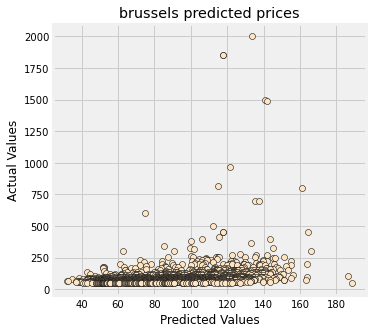

In [47]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('brussels predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [48]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_brussels)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 5336 files in the dataset
There is 1233 to be regressed with accommodates <=2


In [49]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  -34.42947452062198
Coefficients:  [ 26.73644762  11.89619025  -7.35449316   0.7017256    5.11571976
 -20.48003314   6.99263661  20.202888    -5.12011922]
LinearRegression()


In [50]:
y_pred2_2 = regr2.predict(X_2)

In [51]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(958, 3)

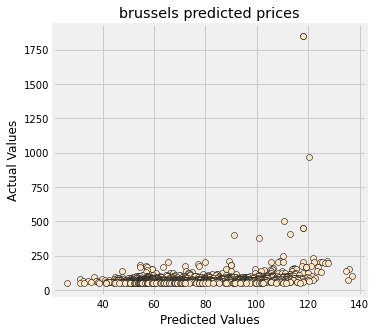

In [52]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('brussels predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [53]:
## Regression fucntion, rooms for 2 or less

In [54]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_brussels)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 5336 files in the dataset
There is 2990 to be regressed with accommodates <=6


In [55]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  -37.748159271254465
Coefficients:  [ 13.83347902  25.36643086  -0.89240056   0.93735571  -2.62730932
 -18.9327187    9.23467031  29.36303964 -11.80194522]
LinearRegression()


In [56]:
y_pred6_6 = regr6.predict(X_6)

In [57]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(2616, 3)

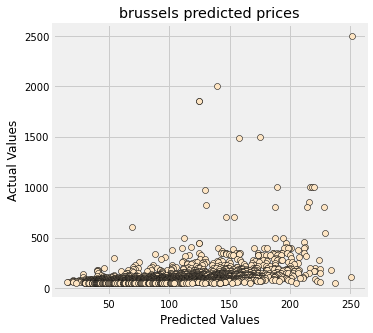

In [58]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('brussels predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [59]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_brussels)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 5336 files in the dataset
There is 3155 to be regressed


In [60]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  -23.17768865148109
Coefficients:  [ 17.35076794  30.19549835  -3.46950705   1.04700143   3.84668979
   4.08402957   1.95914232  15.73216549 -27.33512191]
LinearRegression()


In [61]:
y_predall_all = regrall.predict(X_all)

In [62]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(2781, 3)

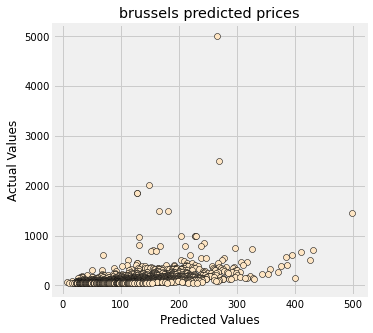

In [63]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('brussels predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [64]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
0,2352,Entire rental unit,Entire home/apt,5,2.0,2.0,92,57,4.47000,4.650000,4.710000,4.0600,4.470000
1,2354,Entire rental unit,Entire home/apt,4,1.0,1.0,78,67,4.00000,5.000000,5.000000,5.0000,5.000000
2,48180,Entire rental unit,Entire home/apt,2,2.0,2.0,200,90,4.60828,4.735206,4.609334,4.7457,4.607511
3,52796,Entire rental unit,Entire home/apt,3,1.0,1.0,74,62,4.85000,4.870000,4.870000,4.8200,4.710000
7,96293,Entire serviced apartment,Entire home/apt,6,1.0,4.0,124,63,4.36000,4.480000,4.500000,3.8500,4.170000


In [65]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  -23.17768865148109
Coefficients:  [ 17.35076794  30.19549835  -3.46950705   1.04700143   3.84668979
   4.08402957   1.95914232  15.73216549 -27.33512191]
Intercept:  -34.42947452062198
Coefficients:  [ 26.73644762  11.89619025  -7.35449316   0.7017256    5.11571976
 -20.48003314   6.99263661  20.202888    -5.12011922]
Intercept:  -3.634553245664364
Coefficients:  [ 11.07005371  17.09655238  -5.32497999   0.72902668  -3.21873955
 -11.42139279   1.29565458  21.65817312  -3.95937677]
Intercept:  -37.748159271254465
Coefficients:  [ 13.83347902  25.36643086  -0.89240056   0.93735571  -2.62730932
 -18.9327187    9.23467031  29.36303964 -11.80194522]


In [66]:
df_brussels_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
1331,1331,110,$110.00,191.496174,81.496174,https://www.airbnb.com/rooms/18737468,50.82340,4.38319,4,Ixelles,4.94,4.92,4.80,4.88,4.90,4.66,4.76,51
1235,1235,135,$135.00,180.720761,45.720761,https://www.airbnb.com/rooms/17429710,50.83123,4.38237,4,Etterbeek,4.93,5.00,4.73,5.00,5.00,4.80,4.93,16
2445,2445,150,$150.00,180.531625,30.531625,https://www.airbnb.com/rooms/33228831,50.84055,4.35296,4,Bruxelles,4.53,4.67,4.40,5.00,4.73,4.87,4.60,15
27,27,82,$82.00,179.118685,97.118685,https://www.airbnb.com/rooms/291209,50.83190,4.34132,4,Saint-Gilles,4.52,4.53,4.10,4.72,4.82,4.77,4.51,146
94,94,130,$130.00,177.502202,47.502202,https://www.airbnb.com/rooms/877917,50.84764,4.34346,4,Bruxelles,4.94,4.94,4.88,5.00,5.00,4.94,4.94,16


## Find the highest predicted in brussels - <= 4

In [69]:
df_brussels_query_filter['% Diff'] = (df_brussels_query_filter['Price']/df_brussels_query_filter['Predicted']-1)* 100
df_brussels_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_brussels_query_final = df_brussels_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_brussels_query_final)} listings that meet criteria')
df_brussels_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head(6)


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 733 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
1331,110,191.50,-42.56,4.94,4.92,4.80,4.66,4.76,Ixelles,https://www.airbnb.com/rooms/18737468,4,51
1235,135,180.72,-25.30,4.93,5.00,4.73,4.80,4.93,Etterbeek,https://www.airbnb.com/rooms/17429710,4,16
2445,150,180.53,-16.91,4.53,4.67,4.40,4.87,4.60,Bruxelles,https://www.airbnb.com/rooms/33228831,4,15
27,82,179.12,-54.22,4.52,4.53,4.10,4.77,4.51,Saint-Gilles,https://www.airbnb.com/rooms/291209,4,146
94,130,177.50,-26.76,4.94,4.94,4.88,4.94,4.94,Bruxelles,https://www.airbnb.com/rooms/877917,4,16
1485,220,174.50,26.07,4.88,4.84,4.68,4.89,4.58,Ixelles,https://www.airbnb.com/rooms/20614417,4,34


## Find the best deal in brussels - <=4

In [68]:
df_brussels_deal = df_brussels_query_final[df_brussels_query_final['Price']<300].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_brussels_deal.head(7)




,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
649,65,173.95,-62.63,4.74,4.67,4.74,4.59,4.56,Schaerbeek,https://www.airbnb.com/rooms/8221805,4,28
199,50,128.46,-61.08,4.74,4.82,4.57,4.56,4.78,Saint-Josse-ten-Noode,https://www.airbnb.com/rooms/2087937,4,195
165,50,122.36,-59.14,4.68,4.84,4.14,4.86,4.68,Saint-Gilles,https://www.airbnb.com/rooms/1525149,4,77
2100,59,143.85,-58.98,4.89,4.92,4.95,4.81,4.89,Schaerbeek,https://www.airbnb.com/rooms/28779370,4,37
2971,50,118.72,-57.88,4.70,4.83,4.63,4.87,4.67,Bruxelles,https://www.airbnb.com/rooms/38788473,4,46
1484,59,139.25,-57.63,4.63,4.74,4.62,4.75,4.63,Bruxelles,https://www.airbnb.com/rooms/20610782,4,110
2569,72,165.46,-56.48,4.73,4.94,4.71,4.84,4.61,Ixelles,https://www.airbnb.com/rooms/34997926,4,51
